In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [18]:
#load csv
df = pd.read_csv("data/winequality-red.csv")

In [7]:
#load data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                             --------------  ----- 
 0   fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality  1599 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


In [19]:
df.head()

,"fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality"
0,"7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0...."
1,"7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0...."
2,"7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0..."
3,"11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,..."
4,"7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0...."


In [11]:
#convert the quality into binary classification
df['quality_label'] = df['quality'].apply(lambda x: 'good' if x >= 6 else 'bad')
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

In [20]:
#train test split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#train model

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [23]:
#test and predict
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bad       0.68      0.74      0.71       141
        good       0.78      0.73      0.75       179

    accuracy                           0.73       320
   macro avg       0.73      0.74      0.73       320
weighted avg       0.74      0.73      0.74       320



<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

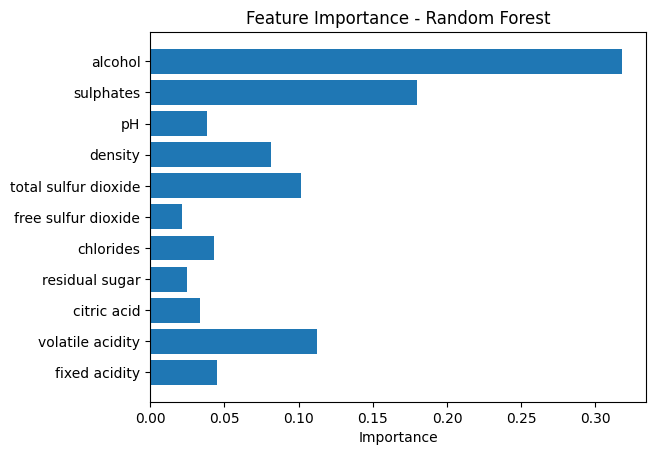

In [ ]:
#feature importance plot
importances = rf_model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()